In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [6]:
# --- 1. Data Analysis (20 Marks) ---

# Load the dataset (Excel file)
df = pd.read_excel('Testdataset3.xlsx') 

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())  # Use display() in Jupyter



First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Identify data types of each column
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
# Check for missing or inconsistent data
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# --- 2. Data Cleaning (20 Marks) ---

# Handle missing values in 'Age' by filling with the median
df['Age'] = df['Age'].fillna(df['Age'].median())
print("\nFilled missing 'Age' values with median.")

# Handle missing values in 'Embarked' by filling with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print("Filled missing 'Embarked' values with mode.")

# Handle missing values in 'Fare' by filling with the median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
print("Filled missing 'Fare' values with median.")

# Convert categorical features to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print("\nConverted 'Sex' and 'Embarked' to numerical.")


Filled missing 'Age' values with median.
Filled missing 'Embarked' values with mode.
Filled missing 'Fare' values with median.

Converted 'Sex' and 'Embarked' to numerical.



Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


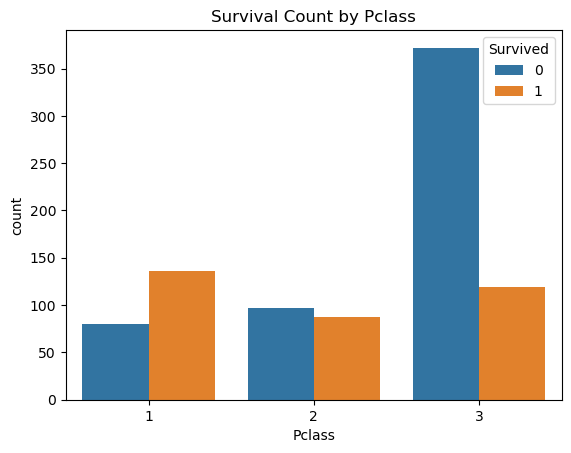

In [10]:
# --- 3. Exploratory Data Analysis (EDA) (30 Marks) ---

# Survival rate across Pclass
print("\nSurvival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()


Survival rate by Sex:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


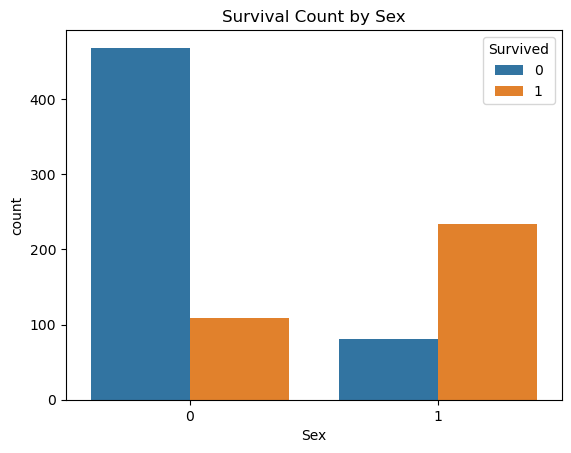

In [11]:
# Survival rate across Sex
print("\nSurvival rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()


Survival rate by Embarked:
Embarked
0    0.339009
1    0.553571
2    0.389610
Name: Survived, dtype: float64


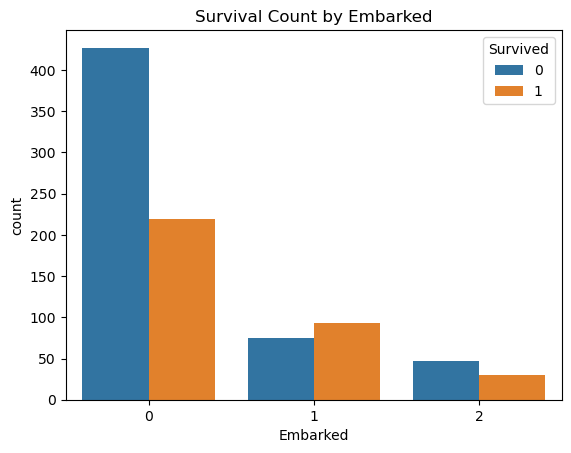

In [12]:
# Survival rate across Embarked
print("\nSurvival rate by Embarked:")
print(df.groupby('Embarked')['Survived'].mean())
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked')
plt.show()


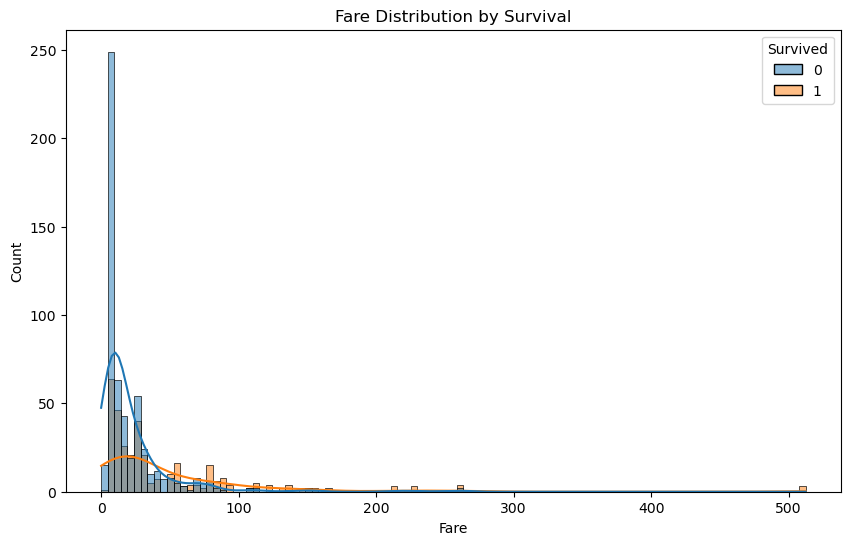

In [13]:
# Survival rate across Fare
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

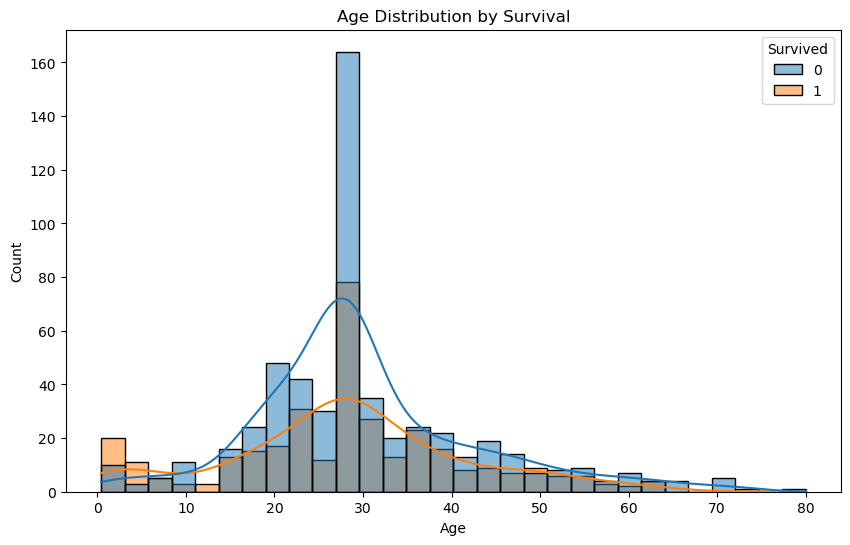

In [14]:
# Age distribution for survivors vs. non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

In [15]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[89 16]
 [20 54]]
